# 豆瓣Top250电影数据分析

In [1]:
import pandas as pd
movie_frame = pd.read_excel('top250.xlsx')

## 评分电影个数统计

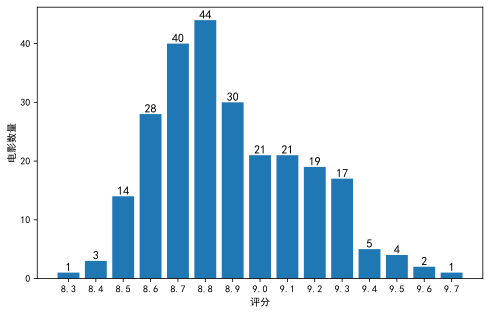

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 用pandas的groupby方法将表格按照评分来计数 得到的是pandas.series对象
score = movie_frame.groupby('评分')['标题'].count().reset_index()

# 创建8*5的画布
plt.figure(figsize=(8, 5))
# 建立柱状图 x轴是score的评分一列 y轴是score的标题一列 这里的标题已经被处理过了 变成了计数
plt.bar(np.array(score['评分']),
        np.array(score['标题']),
        width=0.08,
        align='center')
# 图表的刻度变成score['评分']中的值
plt.xticks(score['评分'])
# 刻度的宽度
plt.tick_params(width=0.8)
# 设置x,y轴的标签
plt.xlabel('评分')
plt.ylabel('电影数量')
# 每个定位坐标中显示具体的值
for a, b in zip(score['评分'], score['标题']):
    plt.text(a, b, b, ha="center", va="bottom", fontsize=12)
# 保存图像位avg矢量格式
plt.savefig('img/Movie-ScoreCount.svg',format='svg')

## 各电影类型电影数量

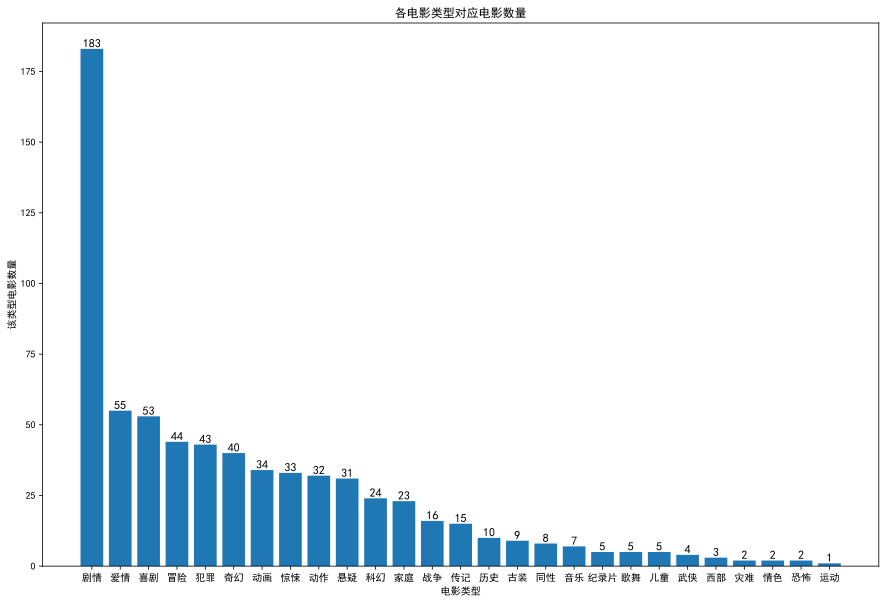

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 需要统计每个类型的个数，又因为单元格中的包含很多类型，所以需要建立字典
Movies_TypeDic = {}
# 遍历所有的行索引
for i in movie_frame.index:
    # 将每个单元格中的内容切片 成一个列表
    movie_TypeList = movie_frame['电影类型'].at[i].split()
    # 对得到的列表迭代 如果没有该类型：则初始化为1 ，若一存在这个类型：则将这个类型累加1
    for x in movie_TypeList:
        if x not in Movies_TypeDic.keys():
            Movies_TypeDic[x] = 1
        else:
            Movies_TypeDic[x] += 1
# 把存放数据的字典变成pd.Series对象
Movies_Types = pd.Series(Movies_TypeDic).sort_values(ascending=False)
# 以下的操作即对series对象的绘制柱状图 与之前相似
plt.figure(figsize=(15, 10))
plt.bar(np.array(Movies_Types.index), np.array(Movies_Types.values), width=0.8)
for a, b in zip(np.array(Movies_Types.index), np.array(Movies_Types.values)):
    plt.text(a, b, b, ha="center", va="bottom", fontsize=12)
plt.tick_params(width=0.8)
plt.title('各电影类型对应电影数量')
plt.ylabel('该类型电影数量')
plt.xlabel('电影类型')
plt.savefig('img/Movies-Types.svg', format='svg')


## 各制片国家电影数量

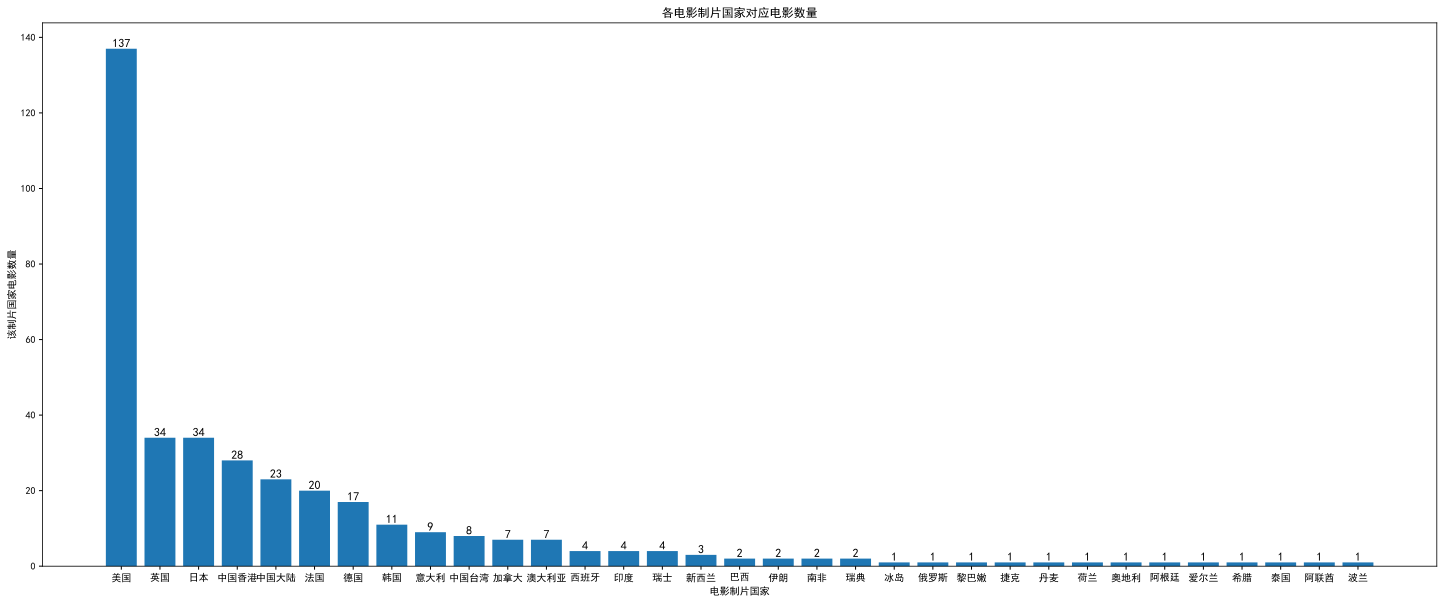

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# # 需要统计每个制片国家的个数，又因为单元格中的包含很多制片国家，所以需要建立字典
Movies_CountryDic = {}
for i in movie_frame.index:
    # 将每个单元格中的内容切片 成一个列表
    movie_CountryList = movie_frame['制片国家'].at[i].split()
    # 对得到的列表迭代 如果没有该制片国家：则初始化为1 ，若一存在这个制片国家：则将这个制片国家累加1
    for x in movie_CountryList:
        if x not in Movies_CountryDic.keys():
            Movies_CountryDic[x] = 1
        else:
            Movies_CountryDic[x] += 1

# 把存放数据的字典变成pd.Series对象
Movies_countries = pd.Series(Movies_CountryDic).sort_values(ascending=False)
# 对series对象的绘制柱状图
plt.figure(figsize=(25, 10))
plt.bar(np.array(Movies_countries.index),
        np.array(Movies_countries.values),
        width=0.8)
for a, b in zip(np.array(Movies_countries.index),
                np.array(Movies_countries.values)):
    plt.text(a, b, b, ha="center", va="bottom", fontsize=12)
plt.tick_params(width=1)
plt.title('各电影制片国家对应电影数量')
plt.ylabel('该制片国家电影数量')
plt.xlabel('电影制片国家')
plt.savefig('img/Movies-Countries.svg', format='svg')


## 电影排名评分散点图

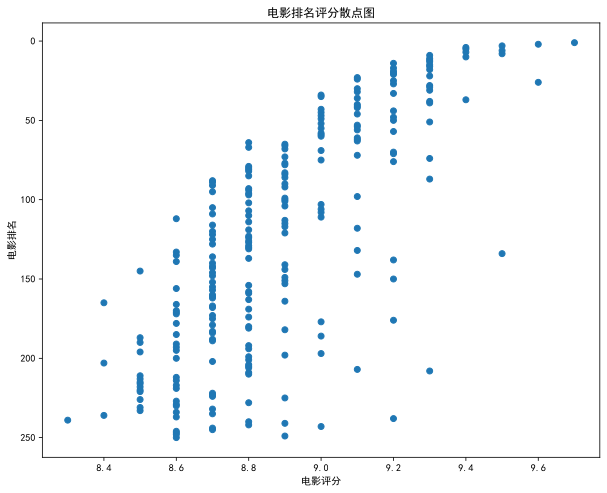

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 根据评分与排名的制作散点图 来看相关性
plt.figure(figsize=(10, 8))
plt.scatter(movie_frame['评分'], movie_frame['排名'])
plt.title('电影排名评分散点图')
plt.xlabel('电影评分')
plt.ylabel('电影排名')
plt.gca().invert_yaxis()
plt.savefig('img/Movie-Rank_Score.svg', format='svg')

## 各导演电影上榜数量前十名

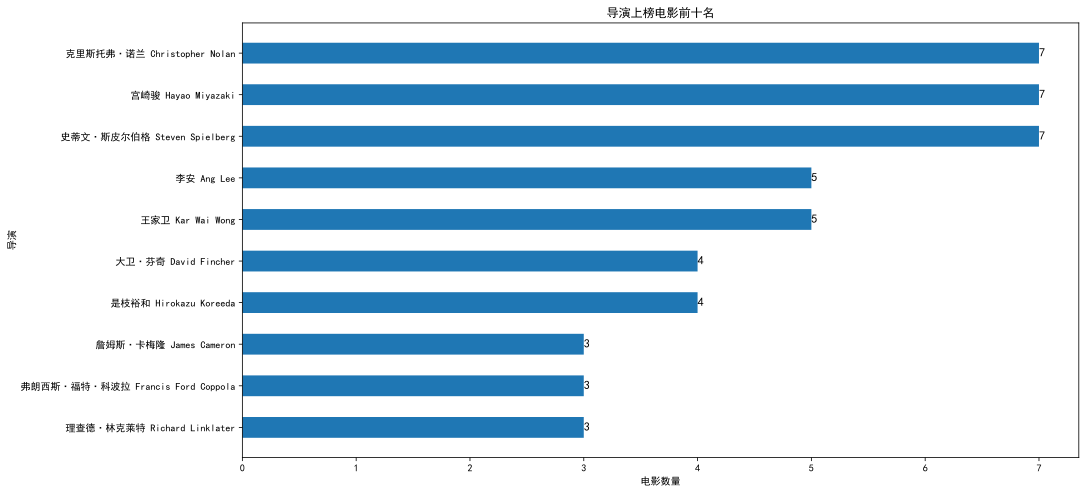

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 需要统计每个导演的电影数量，又因为每部电影存在多个导演，对表格直接处理会不方便，所以需要建立字典
Movie_DirectorsDic = {}
for i in movie_frame.index:
    # 将每个单元格中的内容切片 成一个列表
    Movie_DirectorsList = movie_frame['导演'].at[i].split('/')
    # 对得到的列表迭代 如果没有该导演：则初始化为1 ，若一存在该导演：则将该导演累加1
    for x in Movie_DirectorsList:
        if x not in Movie_DirectorsDic.keys():
            Movie_DirectorsDic[x] = 1
        else:
            Movie_DirectorsDic[x] += 1
# 将得到的字典转变成series对象
Movie_Directors = pd.Series(Movie_DirectorsDic).sort_values(ascending=False)
# 对series对象的绘制条形图
plt.figure(figsize=(15, 8))
plt.barh(np.array(Movie_Directors.index)[:10],
         height=0.5,
         width=np.array(Movie_Directors.values)[:10],
         align="center")
for a, b in zip(np.array(Movie_Directors.index[:10]),
                np.array(Movie_Directors.values[:10])):
    plt.text(b, a, b, ha="left", va="center", fontsize=12)
plt.gca().invert_yaxis()
plt.ylabel('导演')
plt.xlabel('电影数量')
plt.title('导演上榜电影前十名')
plt.savefig('img/Director-Top10.svg', format='svg')


## 上映时间分布

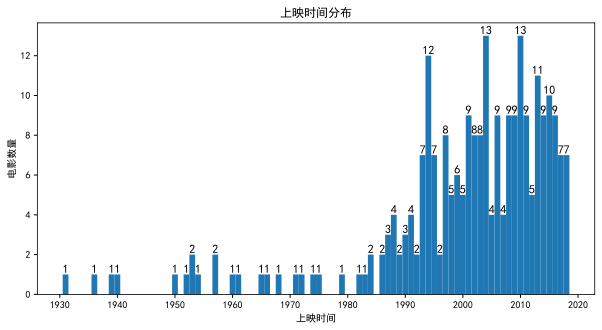

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 用groupby方法统计每个上映时间的电影数量 返回series对象
Movies_Years = movie_frame.groupby('上映时间')['标题'].count().reset_index()
# 对series对象的绘制柱状图
plt.figure(figsize=(10, 5))
plt.bar(
    np.array(Movies_Years['上映时间']),
    np.array(Movies_Years['标题']),
    width=1,
)
for a, b in zip(Movies_Years['上映时间'], Movies_Years['标题']):
    plt.text(a, b, b, ha="center", va="bottom", fontsize=12)
plt.xticks(range(1930, 2021, 10))
plt.tick_params(width=1)
plt.xlabel('上映时间')
plt.ylabel('电影数量')
plt.title('上映时间分布')
plt.savefig('img/Movies_years.svg', format='svg')


## 年份区间统计

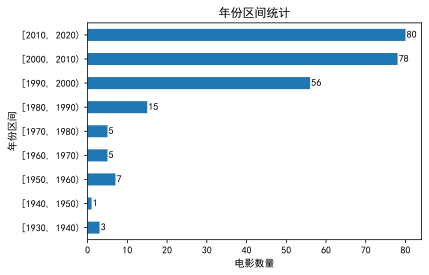

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["font.sans-serif"]="SimHei" #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法正常显示的问题
%config InlineBackend.figure_format='svg'#将图表设置成矢量图格式，使图表更清楚

# 对表格中的数据进行区间划分 每十年为一个区间
Years_cuts = pd.cut(movie_frame['上映时间'],
                    bins=range(1930, 2021, 10),
                    right=False)
# 对这些上映时间区间计数
Years_count = Years_cuts.value_counts().sort_index()
# 对计数后绘制条形图
Years_count.plot.barh()
for a, b in zip(Years_count.values, range(len(Years_count))):
    plt.text(a + 0.3, b, a, va='center')
plt.xlabel('电影数量')
plt.ylabel('年份区间')
plt.title('年份区间统计')
plt.savefig('img/movie-YearsCut.svg', format='svg')
